# Weather Forecasting

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Import the data
weather_data = pd.read_csv('weather.csv')
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [18]:
rain_df = weather_data[['Date','Rainfall']]
rain_df.head()

,Date,Rainfall
0,2008-12-01,0.6
1,2008-12-02,0.0
2,2008-12-03,0.0
3,2008-12-04,0.0
4,2008-12-05,1.0


In [19]:
rain_df.shape

(145460, 2)

In [20]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      145460 non-null  object 
 1   Rainfall  142199 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


### Using 100 values

In [21]:
rain_df = rain_df.loc[:99]
rain_df.head()

,Date,Rainfall
0,2008-12-01,0.6
1,2008-12-02,0.0
2,2008-12-03,0.0
3,2008-12-04,0.0
4,2008-12-05,1.0


In [22]:
rain_df.shape

(100, 2)

In [23]:
# Convert the time column into datetime
rain_df['Date'] = pd.to_datetime(rain_df['Date'])
rain_df['Date'].head()

0   2008-12-01
1   2008-12-02
2   2008-12-03
3   2008-12-04
4   2008-12-05
Name: Date, dtype: datetime64[ns]

In [24]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      100 non-null    datetime64[ns]
 1   Rainfall  99 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [25]:
# fill the empty row
rain_df = rain_df.fillna(rain_df['Rainfall'].mean())
rain_df.head()

,Date,Rainfall
0,2008-12-01,0.6
1,2008-12-02,0.0
2,2008-12-03,0.0
3,2008-12-04,0.0
4,2008-12-05,1.0


**Dataset Explanation**

In [26]:
rain_df.describe()

,Rainfall
count,100.000000
mean,0.662626
std,2.599401
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,16.800000


In [27]:
# Reset the index 
rain_df.set_index("Date", inplace=True)

## Data Visualization

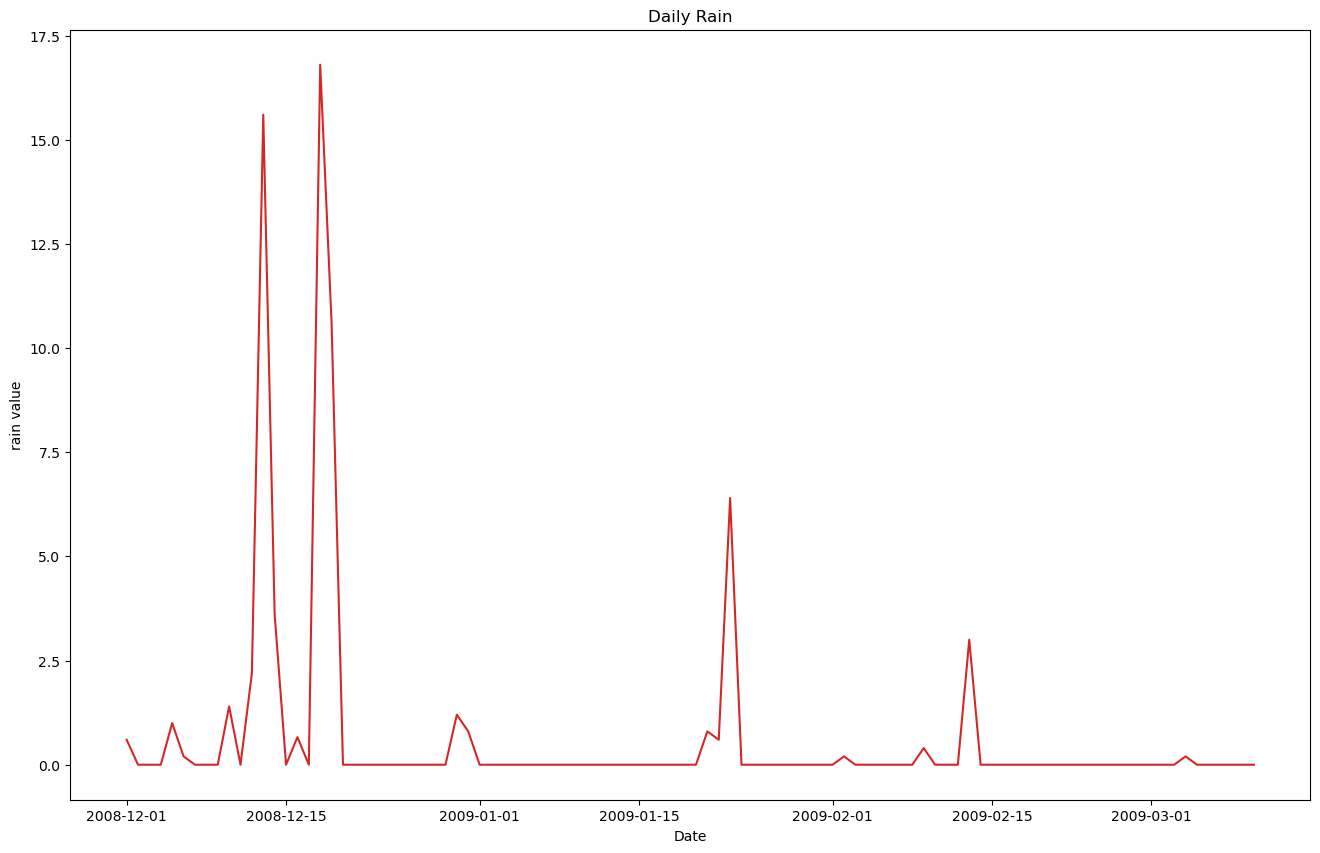

In [28]:
# Plot the daily temperature change 
plt.figure(figsize=(16,10), dpi=100)
plt.plot(rain_df.index, rain_df.Rainfall, color='tab:red')
plt.gca().set(title="Daily Rain", xlabel='Date', ylabel="rain value")
plt.show()

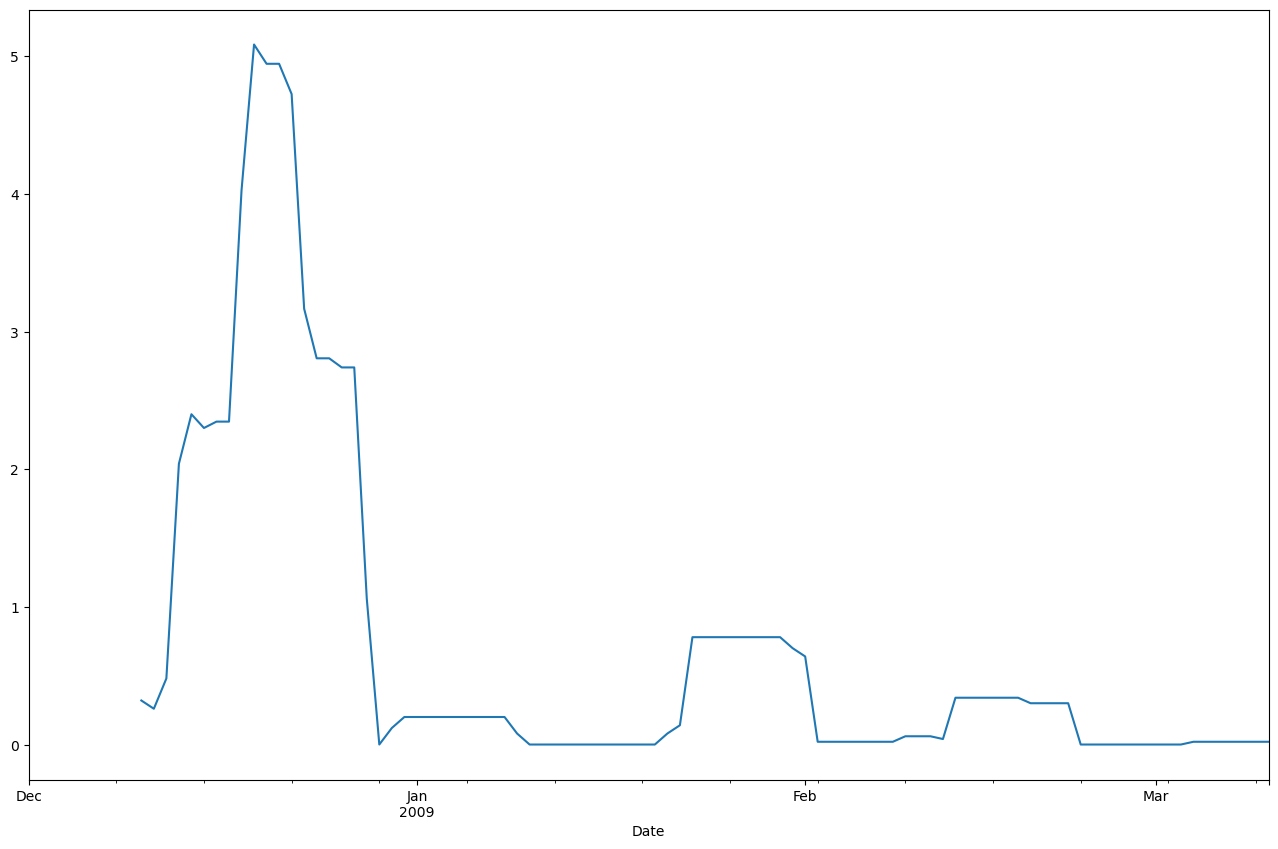

In [29]:
# Apply the Moving Average function by a subset of size 10 days.
rain_df_mean = rain_df.Rainfall.rolling(window=10).mean()
rain_df_mean.plot(figsize=(16,10))
plt.show()

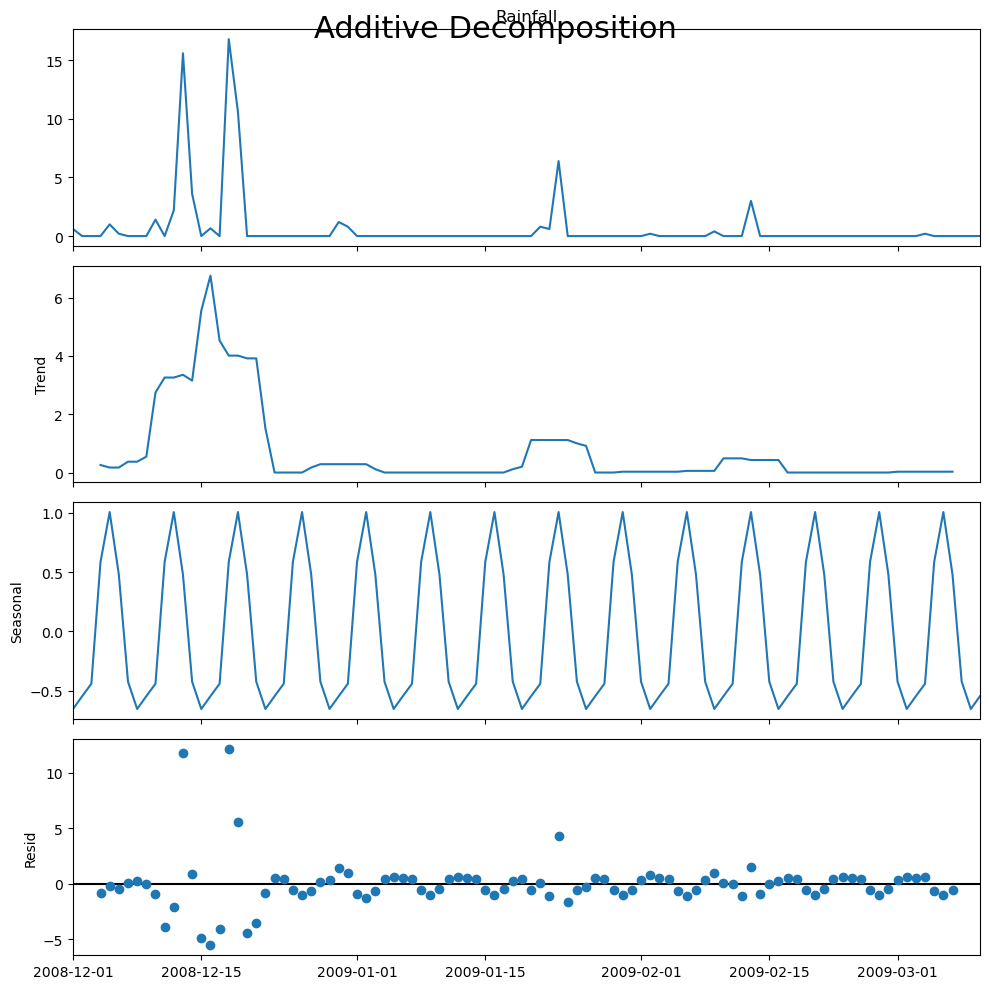

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(rain_df.Rainfall, model='additive', extrapolate_trend=0)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()

## Baseline Model

In [31]:
# Shift the current rain to the next day. 
predicted_df = rain_df["Rainfall"].to_frame().shift(1).rename(columns = {"Rainfall": "rain_pred" })
actual_df = rain_df["Rainfall"].to_frame().rename(columns = {"Rainfall": "rain_actual" })

# Concatenate the actual and predicted rain
one_step_df = pd.concat([actual_df,predicted_df],axis=1)

# Select from the second row, because there is no prediction for today due to shifting.
one_step_df = one_step_df[1:]
one_step_df.head(10)

,rain_actual,rain_pred
Date,,
2008-12-02,0.0,0.6
2008-12-03,0.0,0.0
2008-12-04,0.0,0.0
2008-12-05,1.0,0.0
2008-12-06,0.2,1.0
2008-12-07,0.0,0.2
2008-12-08,0.0,0.0
2008-12-09,0.0,0.0
2008-12-10,1.4,0.0


Here we can see that,we have two column one is our actual rain column and other is predicted rain column that we will use in the next model

We could validate how well our model is by looking at the Root Mean Squared Error(RMSE) between the predicted and actual rain

In [32]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

# Calculate the RMSE
rain_pred_err = MSE(one_step_df.rain_actual, one_step_df.rain_pred, squared=False)
print("The RMSE is",rain_pred_err)

The RMSE is 2.9767417397432614


Our RMSE value is 2.9767 is arround 3 that are pretty good for model.

## Using SARIMA model

### Parameter Selection

**Grid Search**

We are going to apply one of the most commonly used method for time-series forecasting, known as SARIMA, which stands for Seasonal Autoregressive Integrated Moving Average. SARIMA models are denoted with the notation SARIMA(p,d,q)(P,D,Q,s). These three parameters account for seasonality, trend, and noise in data:

We will use a “grid search” to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal SARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality.

In [33]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [34]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(one_step_df.rain_actual,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

### Fitting the Model

In [35]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
# Import the statsmodels library for using SARIMAX model
import statsmodels.api as sm

# Fit the SARIMAX model using optimal parameters
mod = sm.tsa.statespace.SARIMAX(one_step_df.rain_actual,
                                order=(1,1,1),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

In [36]:
results = mod.fit()

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        rain_actual   No. Observations:                   99
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -148.107
Date:                            Thu, 22 Feb 2024   AIC                            306.214
Time:                                    00:16:59   BIC                            317.597
Sample:                                12-02-2008   HQIC                           310.745
                                     - 03-10-2009                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2308      0.171      1.349      0.177      -0.104       0.566
ma.L1         -1.0719      0.075    -14.238      0.000      -1.219      -0.924
ar.S.L12      -0.3637      0.026    -14.196      0.000      -0.414      -0.313
ma.S.L12       0.1861      0.068      2.734      0.006       0.053       0.319
sigma2         3.0698      0.535      5.738      0.000       2.021       4.118
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               180.80
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                            -0.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Predictions

In [38]:
pred = results.predict(start=0,end=99)[1:]
pred

2008-12-03    0.000000
2008-12-04    0.000000
2008-12-05    0.000000
2008-12-06    1.116916
2008-12-07    0.119778
                ...   
2009-03-07   -0.094291
2009-03-08   -0.086765
2009-03-09    0.550950
2009-03-10   -0.265829
2009-03-11   -0.095275
Freq: D, Name: predicted_mean, Length: 99, dtype: float64

In [39]:
pred = results.get_prediction(start=0,end = 99, dynamic=False)
pred_ci = pred.conf_int()

In [40]:
pred_ci.head()

,lower rain_actual,upper rain_actual
2008-12-02,-3394.757202,3394.757202
2008-12-03,-2796.301858,2796.301858
2008-12-04,-2790.520582,2790.520582
2008-12-05,-2790.445890,2790.445890
2008-12-06,-2789.328006,2791.561837


In [41]:
print(pred)

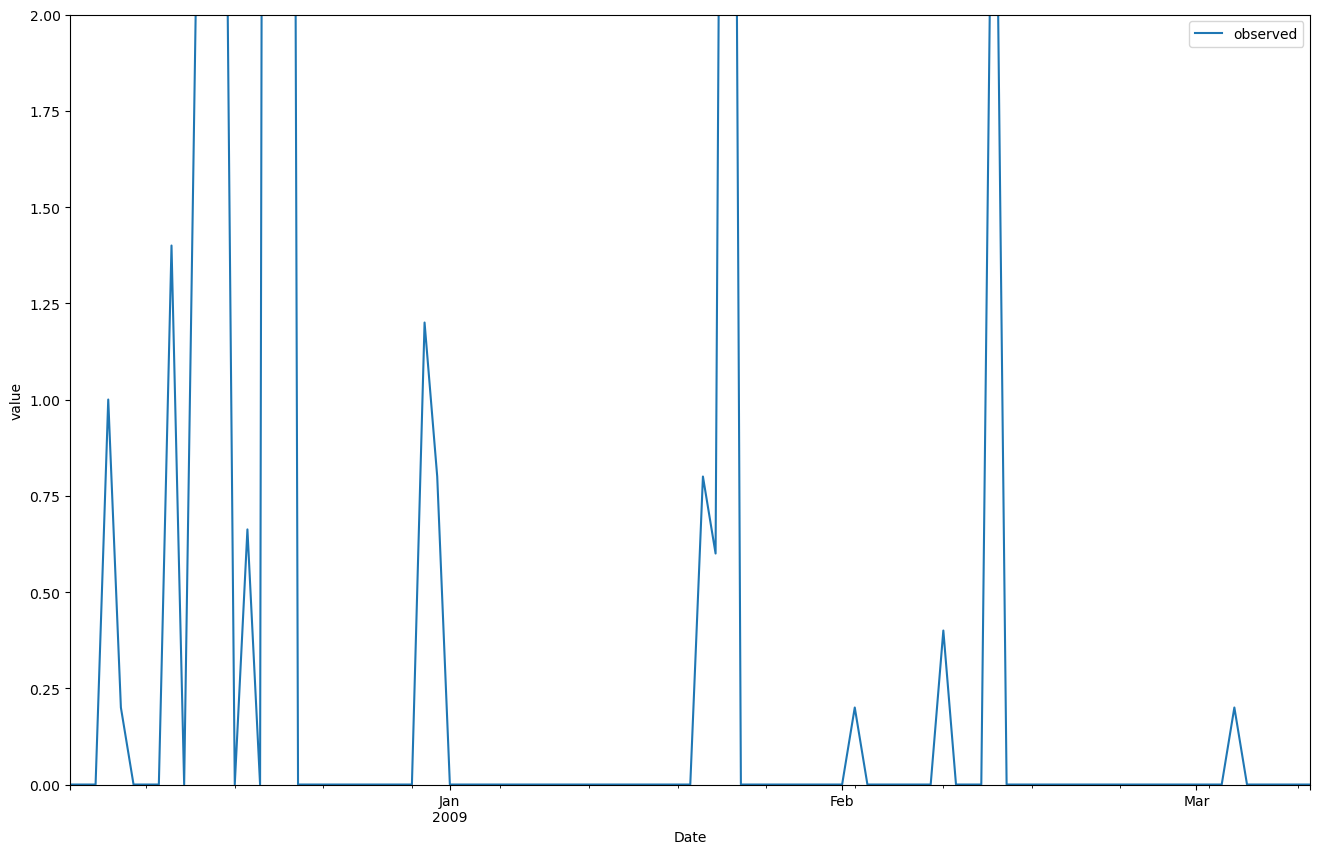

In [42]:
ax = one_step_df.rain_actual.plot(label='observed',figsize=(16,10))
ax.set_xlabel('Date')
ax.set_ylabel('value')
plt.ylim([0,2.0])
plt.legend()
plt.show()

### Forecast Diagnostic

It is also useful to quantify the accuracy of our forecasts. We will use the MSE (Mean Squared Error), in which for each predicted value, we compute its distance to the true value and square the result

In [43]:
y_forecasted = pred.predicted_mean[:99]
y_truth = one_step_df.rain_actual
print(y_forecasted.shape)
print(y_truth.shape)
# Compute the mean square error
mse = MSE(y_truth, y_forecasted, squared=True)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

(99,)
(99,)
The Mean Squared Error of our forecasts is 13.77


Amazziingggg! Our forecast model forecasts the rain with only an error of 13.77.

In the weather forecast field, the prediction error of 2.19 degrees seems promising and sufficient, as there are many other factors that contribute to the change in rain, including but not limited to the wind speed, the air pressure, etc.

### Validating the Dynamic Forecast

In this case, we only use information from the time series up to a certain point, and after that, forecasts are generated using values from previous forecasted time points.

In [44]:
pred_dynamic = results.get_prediction(start=0,end = 99, dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [45]:
pred_dynamic_ci.head()

,lower rain_actual,upper rain_actual
2008-12-02,-3394.757202,3394.757202
2008-12-03,-4602.694165,4602.694165
2008-12-04,-5599.966658,5599.966658
2008-12-05,-6454.166359,6454.166359
2008-12-06,-7209.797000,7209.797000


Once again, we plot the real and forecasted values of the average daily rain to assess how well we did:

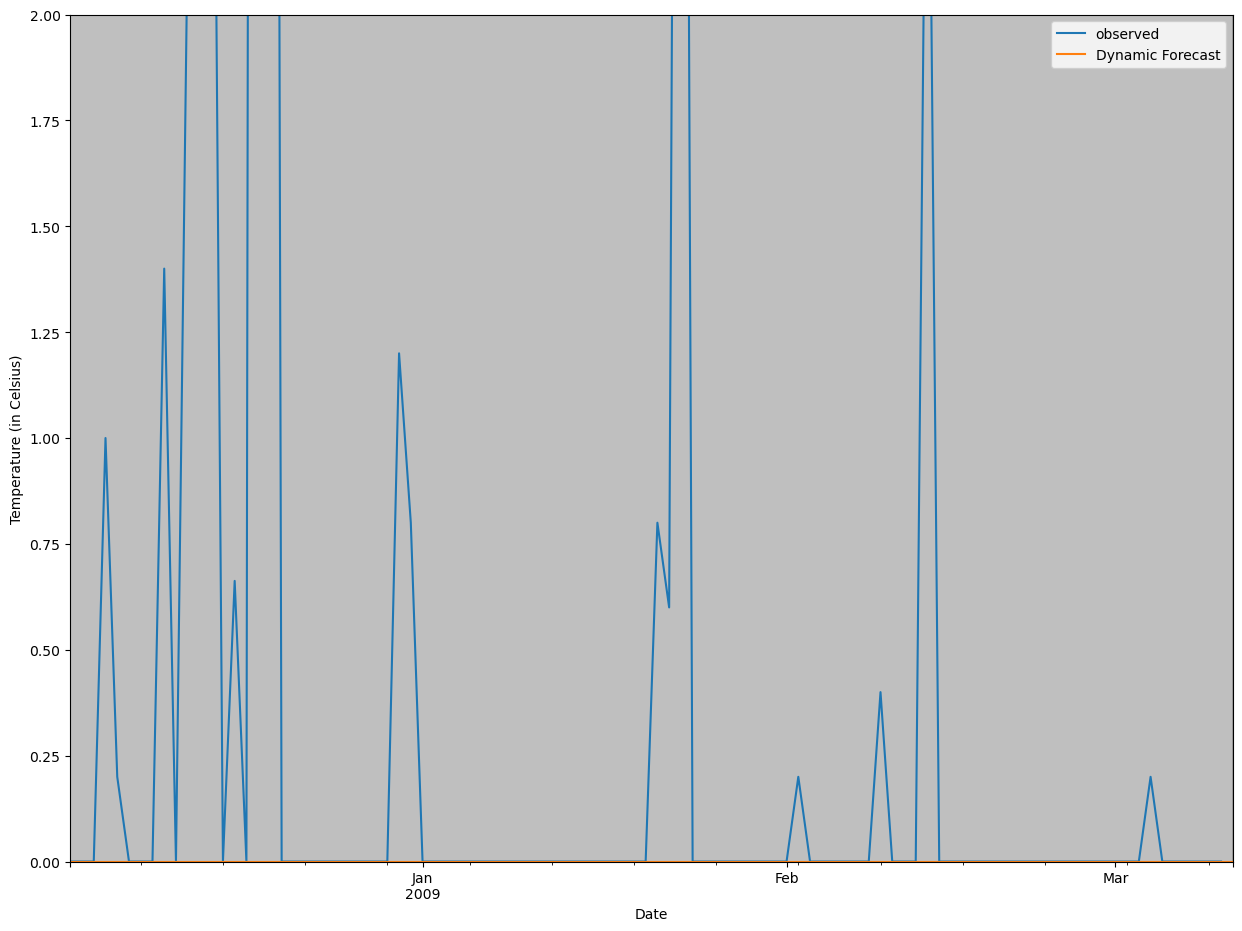

In [46]:
ax = one_step_df.rain_actual.plot(label='observed', figsize=(15, 11))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)


ax.set_xlabel('Date')
ax.set_ylabel('Temperature (in Celsius)')
plt.ylim([0,2.0])
plt.legend()
plt.show()

In this case, the model seems to predict the rain inaccurately, with major fluctuations between the true value and the predicted value.

### Forecast Diagnostic

In [47]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean[:99]
y_truth = one_step_df.rain_actual

# Compute the mean square error
mse = sqrt(MSE(y_truth, y_forecasted).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Root Mean Squared Error of our forecasts is 2.68


The predicted values obtained from the dynamic forecasts yield an MSE of 3.68. This is significantly higher than the one-step ahead, which is to be expected given that we are relying on less historical data from the time series.

## Conclusion

I described how to implement a seasonal SARIMA model in Python. I made extensive use of the pandas and statsmodels libraries and showed how to run model diagnostics, as well as how to produce forecasts of the Rain.

Recall that in the assumption I made in the section 2.2 Baseline Model, I could even reinforce our assumption and continue our belief that the rainfall today depends on the rainfall yesterday, the rainfall yesterday depends on the day before yesterday, and so on.

It is the best so far to use the history up to the point that we would like to make predictions on. Especially it holds for weather forecasting, where the rainfall today does not change much from yesterday, and the transition to another season signaling through the rainfall should gradually occur, unless there is any disastrous factors such as storm, drought, etc.